## Telco Customer Churn 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
data = pd.read_csv(r"C:\Users\WELCOME\Downloads\Telco_Customer_Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##### Feature Description
- customerID	      - Unique ID assigned to each customer.
- gender	          - Customer’s gender (Male/Female).
- SeniorCitizen	  - Indicates if the customer is a senior (1 = Yes, 0 = No).
- Partner	      - Whether the customer has a spouse or partner.
- Dependents       - Whether the customer has dependents (children, etc.).
- tenure	          - Number of months the customer has stayed with the company.
- PhoneService	  - Whether the customer has a phone service.
- MultipleLines	  - Indicates if the customer has multiple phone lines.
- InternetService  - Type of internet service (DSL, Fiber optic, or None).
- OnlineSecurity	  - Whether the customer has online security add-on.
- OnlineBackup	  - Whether the customer has online data backup service.
- DeviceProtection - Whether the customer has device protection service.
- TechSupport	  - Whether the customer has tech support service.
- StreamingTV	  - Whether the customer has streaming TV service.
- StreamingMovies  -	Whether the customer has streaming movies service.
- Contract	      - Type of customer contract (Month-to-month, One year, Two year).
- PaperlessBilling - Indicates if the customer uses paperless billing.
- PaymentMethod	  - Customer’s payment method (e.g., credit card, bank transfer).
- MonthlyCharges	  - The amount charged to the customer monthly.
- TotalCharges	  - The total amount charged to the customer to date.
- Churn	          - Whether the customer left the company (Yes/No).

### Data Understanding

In [3]:
print("Shape of Data :", data.shape)


Shape of Data : (7043, 21)


In [4]:
print("\n Columns of Data :\n", data.columns)



 Columns of Data :
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
print("\n Information of Data :\n")
data.info()



 Information of Data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

In [6]:
print("Data Types :\n")
print(data.dtypes)


Data Types :

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
print("Missing values :\n")
print(data.isnull().sum())


Missing values :

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.tail()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Data Cleaning

In [10]:
# Dropping Duplicates
data.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
# Dropping unimportant features
drop_cols = ['customerID',
             'SeniorCitizen',
             'Partner',
             'Dependents',
             'PhoneService',
             'OnlineBackup',
             'DeviceProtection',
             'StreamingTV',
             'StreamingMovies',
             'PaperlessBilling']

data.drop(drop_cols, axis=1, inplace=True)


In [12]:
# Changing appropriate Datatypes 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

cat_columns = ['gender',
               'MultipleLines',
               'OnlineSecurity',
               'Contract',
               'InternetService',
               'TechSupport',
               'PaymentMethod',
               'Churn']

data[cat_columns] = data[cat_columns].astype('category')

In [13]:
data.dtypes

gender             category
tenure                int64
MultipleLines      category
InternetService    category
OnlineSecurity     category
TechSupport        category
Contract           category
PaymentMethod      category
MonthlyCharges      float64
TotalCharges        float64
Churn              category
dtype: object

In [14]:
# Checking Null values
print(data.isnull().sum())


gender              0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
TechSupport         0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges       11
Churn               0
dtype: int64


In [15]:
# Filling null values
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [16]:
# Rechecking null values
print("Missing values :",data.isnull().sum().sum())


Missing values : 0


In [17]:
# Data Description
print("Data Description :")
data.describe()


Data Description :


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [18]:
print("After Cleaning :", data.shape)


After Cleaning : (7043, 11)


### Identifying Outliers

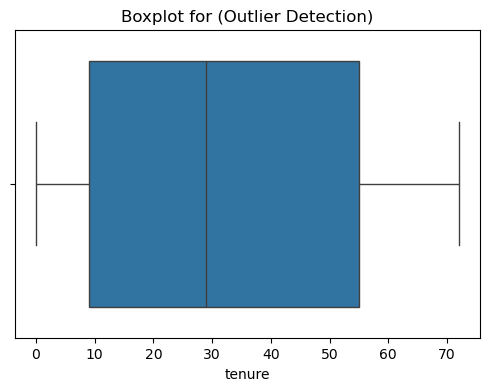

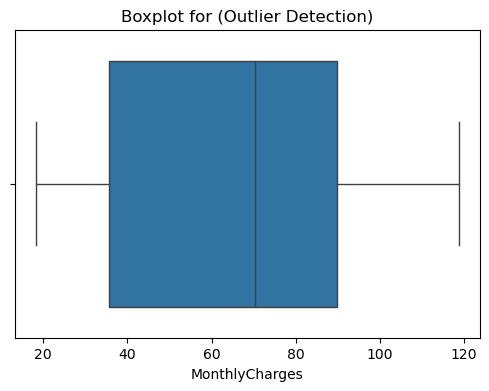

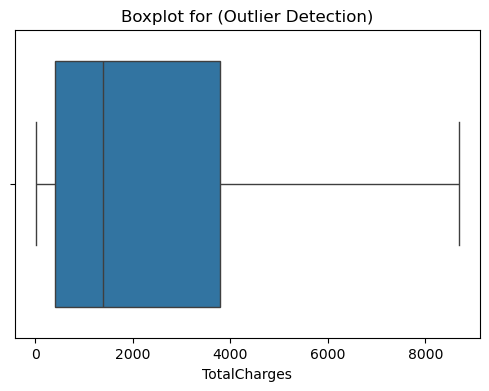

In [19]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title("Boxplot for (Outlier Detection)")
    plt.show()

### Insights
- Customers with tenure below the median (29 months) are more likely to churn.
- Those paying higher than the median monthly charge (more than 70) may churn due to high costs or lack of perceived value.
- Lower total charges usually belong to short-term or new customers, who are more likely to leave soon.
- Customers with higher tenure and total charges are loyal and less likely to churn, showing long-term satisfaction.

## Exploratory Data Analysis

### Univariate Analysis

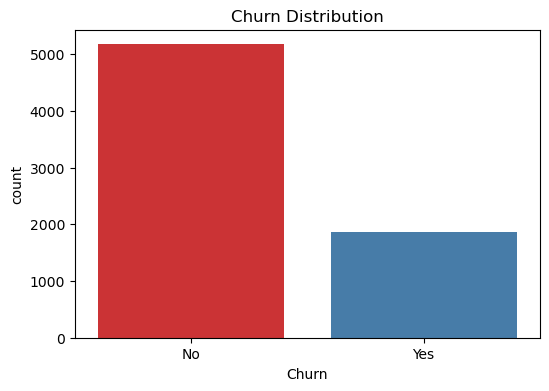

In [20]:
# Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='Set1')
plt.title('Churn Distribution')
plt.show()

### Insights
- The company has a high customer retention rate, as most customers have not churned.
- Customer churn is significantly lower
- The data is imbalanced, with more “No” churn cases than “Yes”.

### Bivariate Analysis

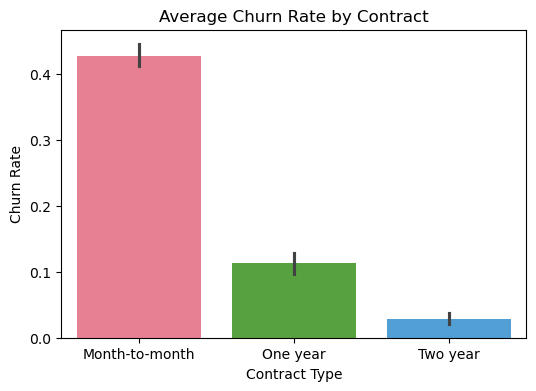

In [21]:
# Contract Type vs Churn
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn', data=data, palette='husl')
plt.title("Average Churn Rate by Contract")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.gca().invert_yaxis()
plt.show()

### Insights
- Customers with month-to-month contracts have the highest churn rate, meaning they leave more often.
- One-year contract customers churn less, showing they are somewhat more loyal.
- Two-year contract customers have the lowest churn rate, showing strong retention.
- Longer contracts seem to reduce customer churn effectively.

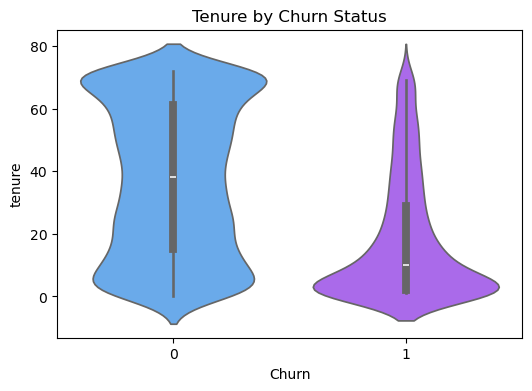

In [22]:
# Tenure vs Churn
plt.figure(figsize=(6,4))
sns.violinplot(x='Churn', y='tenure', data=data, palette='cool')
plt.title("Tenure by Churn Status")
plt.show()

### Insights
- The plot shows a high churn density at low tenure, so improving early customer experience can reduce.
- The churned customers (Yes), the median tenure is very low, meaning most churners leave early.
- The non-churn customers (No), the median tenure is higher, meaning most staying customers have been with the company longer.

### Multivariate Analysis

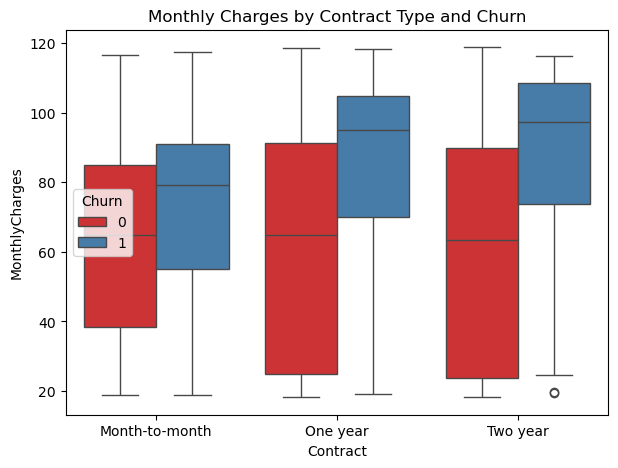

In [23]:
# MonthlyCharges by Contract and Churn
plt.figure(figsize=(7,5))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=data, palette='Set1')
plt.title("Monthly Charges by Contract Type and Churn")
plt.show()

### Insights
- Month-to-month customers who churn pay more every month, so high bills may make them leave.
- People with 1-year and 2-year contracts usually stay, even if their monthly charges are high.
- Long-term contracts reduce churn, because customers are more stable and less likely to leave.

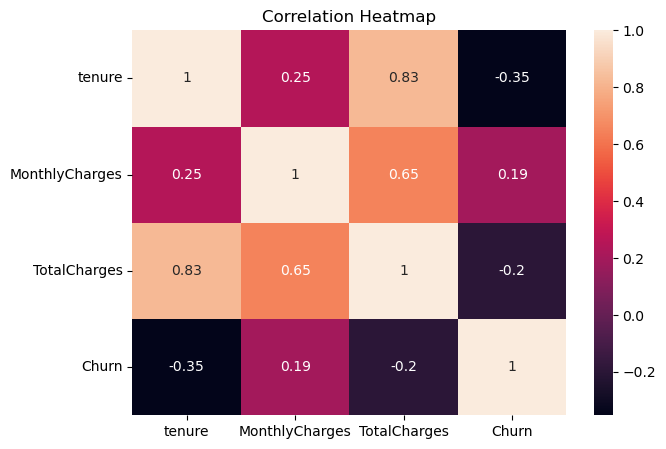

In [24]:
# Correlation Heatmap For Numerical Features - Tenure, MonthlyCharges, TotalCharges
plt.figure(figsize=(7,5))
corr_matrix = data[['tenure','MonthlyCharges','TotalCharges','Churn']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Insights
- Tenure and Churn have a correlation of −0.35, meaning customers with shorter tenure are more likely to churn.
- MonthlyCharges and Churn have a weak positive correlation of 0.19, showing customers paying higher monthly charges churn slightly more.
- TotalCharges and Tenure have a strong positive correlation of 0.83, meaning customers who stay longer naturally accumulate higher total charges.

In [25]:
data.head()

,gender,tenure,MultipleLines,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No phone service,DSL,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,Male,34,No,DSL,Yes,No,One year,Mailed check,56.95,1889.50,0
2,Male,2,No,DSL,Yes,No,Month-to-month,Mailed check,53.85,108.15,1
3,Male,45,No phone service,DSL,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,0
4,Female,2,No,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,1


### Data Preprocessing

### Encoding Categorical Features

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
binary_cols = ['gender', 
               'MultipleLines', 
               'InternetService', 
               'OnlineSecurity', 
               'Contract', 
               'TechSupport', 
               'PaymentMethod', 
               'Churn']

for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])
print(data.head())

   gender  tenure  MultipleLines  InternetService  OnlineSecurity  \
0       0       1              1                0               0   
1       1      34              0                0               2   
2       1       2              0                0               2   
3       1      45              1                0               2   
4       0       2              0                1               0   

   TechSupport  Contract  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0            0         0              2           29.85         29.85      0  
1            0         1              3           56.95       1889.50      0  
2            0         0              3           53.85        108.15      1  
3            2         1              0           42.30       1840.75      0  
4            0         0              2           70.70        151.65      1  


### Feature Scaling

In [27]:
x = data.drop(columns='Churn', axis=1)
y = data['Churn']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

standardized_data = scaler.transform(x)

x = standardized_data
y = data['Churn']


### Data Splitting

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(" Shape of x :", x.shape , "\n Shape of x_train :", x_train.shape ,"\n Shape of x_test :", x_test.shape)


 Shape of x : (7043, 10) 
 Shape of x_train : (5634, 10) 
 Shape of x_test : (1409, 10)


## MODEL EVALUATION

## 1.MODEL - LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)

# Model Training
lr.fit(x_train, y_train)

# Prediction
y_pred_lr = lr.predict(x_test)

# Model Evaluation
print("\n Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("\n Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



 Logistic Regression Accuracy Score: 0.8048261178140526

 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409


 Logistic Regression Confusion Matrix:
 [[929 107]
 [168 205]]


## 2.MODEL - SUPPORT VECTOR CLASSIFIER

In [30]:
from sklearn.svm import SVC

svc = SVC()

# Model Training
svc.fit(x_train, y_train)

# Prediction
y_pred_svc = svc.predict(x_test)

# Model Evaluation
print("\n SVC Accuracy Score:", accuracy_score(y_test, y_pred_svc))
print("\n SVC Classification Report:\n", classification_report(y_test, y_pred_svc))
print("\n SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))



 SVC Accuracy Score: 0.8090844570617459

 SVC Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


 SVC Confusion Matrix:
 [[955  81]
 [188 185]]


## 3.MODEL - K-NEAREST NEIGHBOR CLASSIFIER

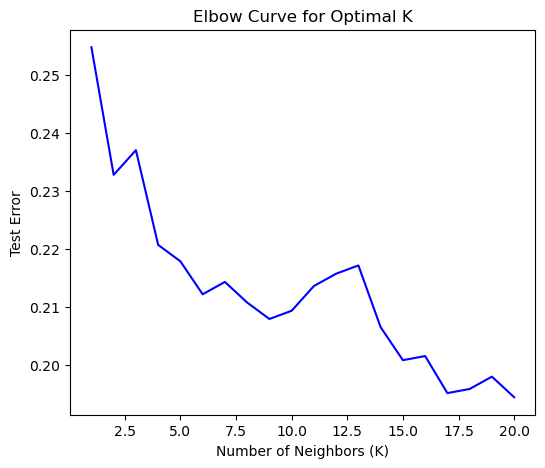


 Best K Value : 20

 f1_score : 0.573208722741433

 KNN Final Accuracy Score: 0.8055358410220014

 KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.81      0.79      1409


 KNN Confusion Matrix:
 [[951  85]
 [189 184]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Finding best K using Elbow Method
error = []

for k in range(1, 21):  # Test K = 1 to 21
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(1 - accuracy_score(y_test, y_pred)) 

# Plot for Elbow Curve
plt.figure(figsize=(6,5))
plt.plot(range(1, 21), error, color='blue')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Error')
plt.show()

# Best K (minimum error)
best_k = error.index(min(error)) + 1
print("\n Best K Value :", best_k)


# Model Training with Best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

# Prediction
y_pred_knn = knn.predict(x_test)

# Model Evaluation
print("\n f1_score :", f1_score(y_test, y_pred_knn))
print("\n KNN Final Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("\n KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\n KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


## 4.MODEL - DECISION TREE CLASSIFIER

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# Model Training
dt.fit(x_train, y_train)

# Predictions
y_pred_dt = dt.predict(x_test)

# Model Evaluation
print("\n DTC Accuracy Score :", accuracy_score(y_test, y_pred_dt))
print("\n DTC Classification Report :\n", classification_report(y_test, y_pred_dt))
print("\n DTC Confusion Matrix :\n", confusion_matrix(y_test, y_pred_dt))



 DTC Accuracy Score : 0.7295954577714692

 DTC Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.49      0.52      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409


 DTC Confusion Matrix :
 [[835 201]
 [180 193]]


## 5.MODEL - RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

# Model Training
rfc.fit(x_train, y_train)

# Prediction
y_pred_rfc = rfc.predict(x_test)

# Model Evaluation
print("\n RFC Accuracy Score :", accuracy_score(y_test, y_pred_rfc))
print("\n RFC Classification Report :\n", classification_report(y_test, y_pred_rfc))
print("\n RFC Confusion Matrix :\n", confusion_matrix(y_test, y_pred_rfc))



 RFC Accuracy Score : 0.7970191625266146

 RFC Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.50      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


 RFC Confusion Matrix :
 [[938  98]
 [188 185]]


## 6.MODEL - XG BOOST CLASSIFIER

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Model Training
xgb.fit(x_train, y_train)

# Prediction
y_pred_xgb = xgb.predict(x_test)

# Model Evaluation
print("\n XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n XGBoost Classification Report :\n", classification_report(y_test, y_pred_xgb))
print("\n XGBoost Confusion Matrix :\n", confusion_matrix(y_test, y_pred_xgb))



 XGBoost Accuracy: 0.7984386089425124

 XGBoost Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.51      0.57       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


 XGBoost Confusion Matrix :
 [[933 103]
 [181 192]]


### Model Comparison

In [35]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svc)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

comparison = {
    "Logistic Regression": acc_lr,
    "SVM": acc_svm,
    "KNN": acc_knn,
    "Decision Tree": acc_dt,
    "Random Forest": acc_rfc,
    "XGBoost": acc_xgb
}

comparison_df = pd.DataFrame(list(comparison.items()), columns=['Model', 'Accuracy'])
comparison_df


,Model,Accuracy
0,Logistic Regression,0.804826
1,SVM,0.809084
2,KNN,0.805536
3,Decision Tree,0.729595
4,Random Forest,0.797019
5,XGBoost,0.798439


### Accuracy Comparison Plot

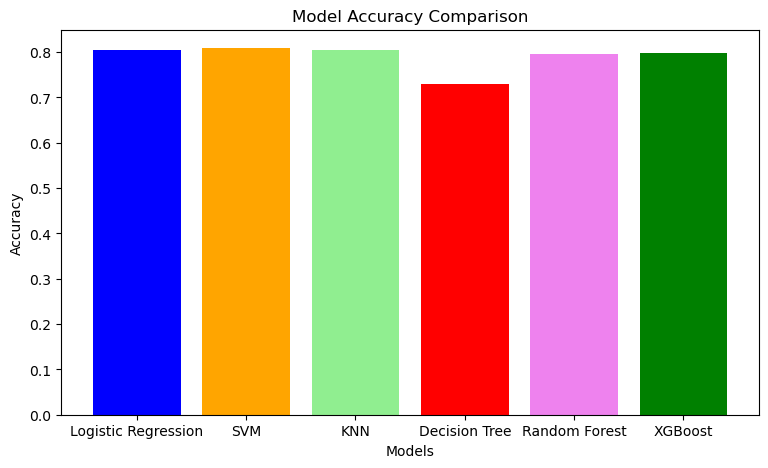

In [36]:
models = ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "XGBoost"]
accuracy = [acc_lr, acc_svm, acc_knn, acc_dt, acc_rfc, acc_xgb]

plt.figure(figsize=(9,5))
plt.bar(models, accuracy, color=['blue','orange','lightgreen','red','violet','green'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


### Hyperparameter Tuning for Best Model

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

print("\n GridSearchCV for Best Model \n")

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5,  n_jobs=-1, scoring='accuracy', verbose=4)
grid_search.fit(x_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

print("\n Best Parameters:", grid_search.best_params_)
print("\n Best Cross-Validation Accuracy:", grid_search.best_score_)

# Prediction
y_pred_svm = best_model.predict(x_test)

# Model Evaluation
print("\n SVM Best Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



 GridSearchCV for Best Model 

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

 Best Cross-Validation Accuracy: 0.7880739352656654

 SVM Best Test Accuracy: 0.808374733853797

 SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.69      0.49      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


 SVM Confusion Matrix:
 [[955  81]
 [189 184]]


### Saving & Loading the Model

In [38]:
import joblib

joblib.dump(best_model,"best_model.pkl")
joblib.dump(label_encoder, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")

loaded_model = joblib.load("best_model.pkl")
loaded_label_encoder = joblib.load("label_encoders.pkl")
loaded_label_encoder = joblib.load("scaler.pkl")

## Overall Insights
## 1. Objective
- The goal was to predict customer churn — identifying customers likely to discontinue telecom services.
- Helps the company take preventive actions and improve customer retention strategies.

## 2. Data Insights
- The dataset included customer demographics, contract details, payment methods, tenure, and charges.
- About 25–30% of customers were churners.

## 3. Key factors influencing churn
- Short tenure (newer customers).
- Month-to-month contracts.
- High monthly charges.
- Electronic check payments.
- Longer contracts and automatic payments were linked to lower churn.

## 4. Model Insights
- Models tested: Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and XGBoost.
- Support vector Classifier performed best with 80.09% accuracy, slightly outperforming ensemble models.
- This suggests churn patterns are mostly linear, and logistic regression captured them effectively.
- Ensemble models (Random Forest, XGBoost) performed closely but didn’t exceed Support vector machine in accuracy.

## 5. Key Findings
- Customers with month-to-month contracts and higher monthly bills are most likely to leave.
- Loyal, long-term customers (with longer tenure) are less likely to churn.
- Payment type also influences churn — customers paying by electronic check churn more frequently.

## 6. Conclusion
- The Support vector machine model is the best current predictor for churn - simple, accurate, and interpretable.
- After Hyperparameter tuning of best model support vector classifier there is not much difference in the accuracy score.
- The analysis reveals clear patterns that can help the telecom company.
- Encourage long-term contracts.
- Offer discounts or loyalty programs for high-risk customers.